In [1]:
import os
import sys
import json
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw
from pathlib import Path
from matplotlib.ticker import MaxNLocator

sys.path.append("../helpers/")
from impresso_id import *

figures_path = "figures"
data_path = "data"

%load_ext autoreload
%autoreload 2

In [2]:
with (open(os.path.join(data_path, "via_annotations_RB.json"), "r")) as f:
    via_annotations_RB = json.load(f)

In [3]:
colors = [(int(color[0]*255), int(color[1]*255), int(color[2]*255), 125) for color in sns.color_palette()]

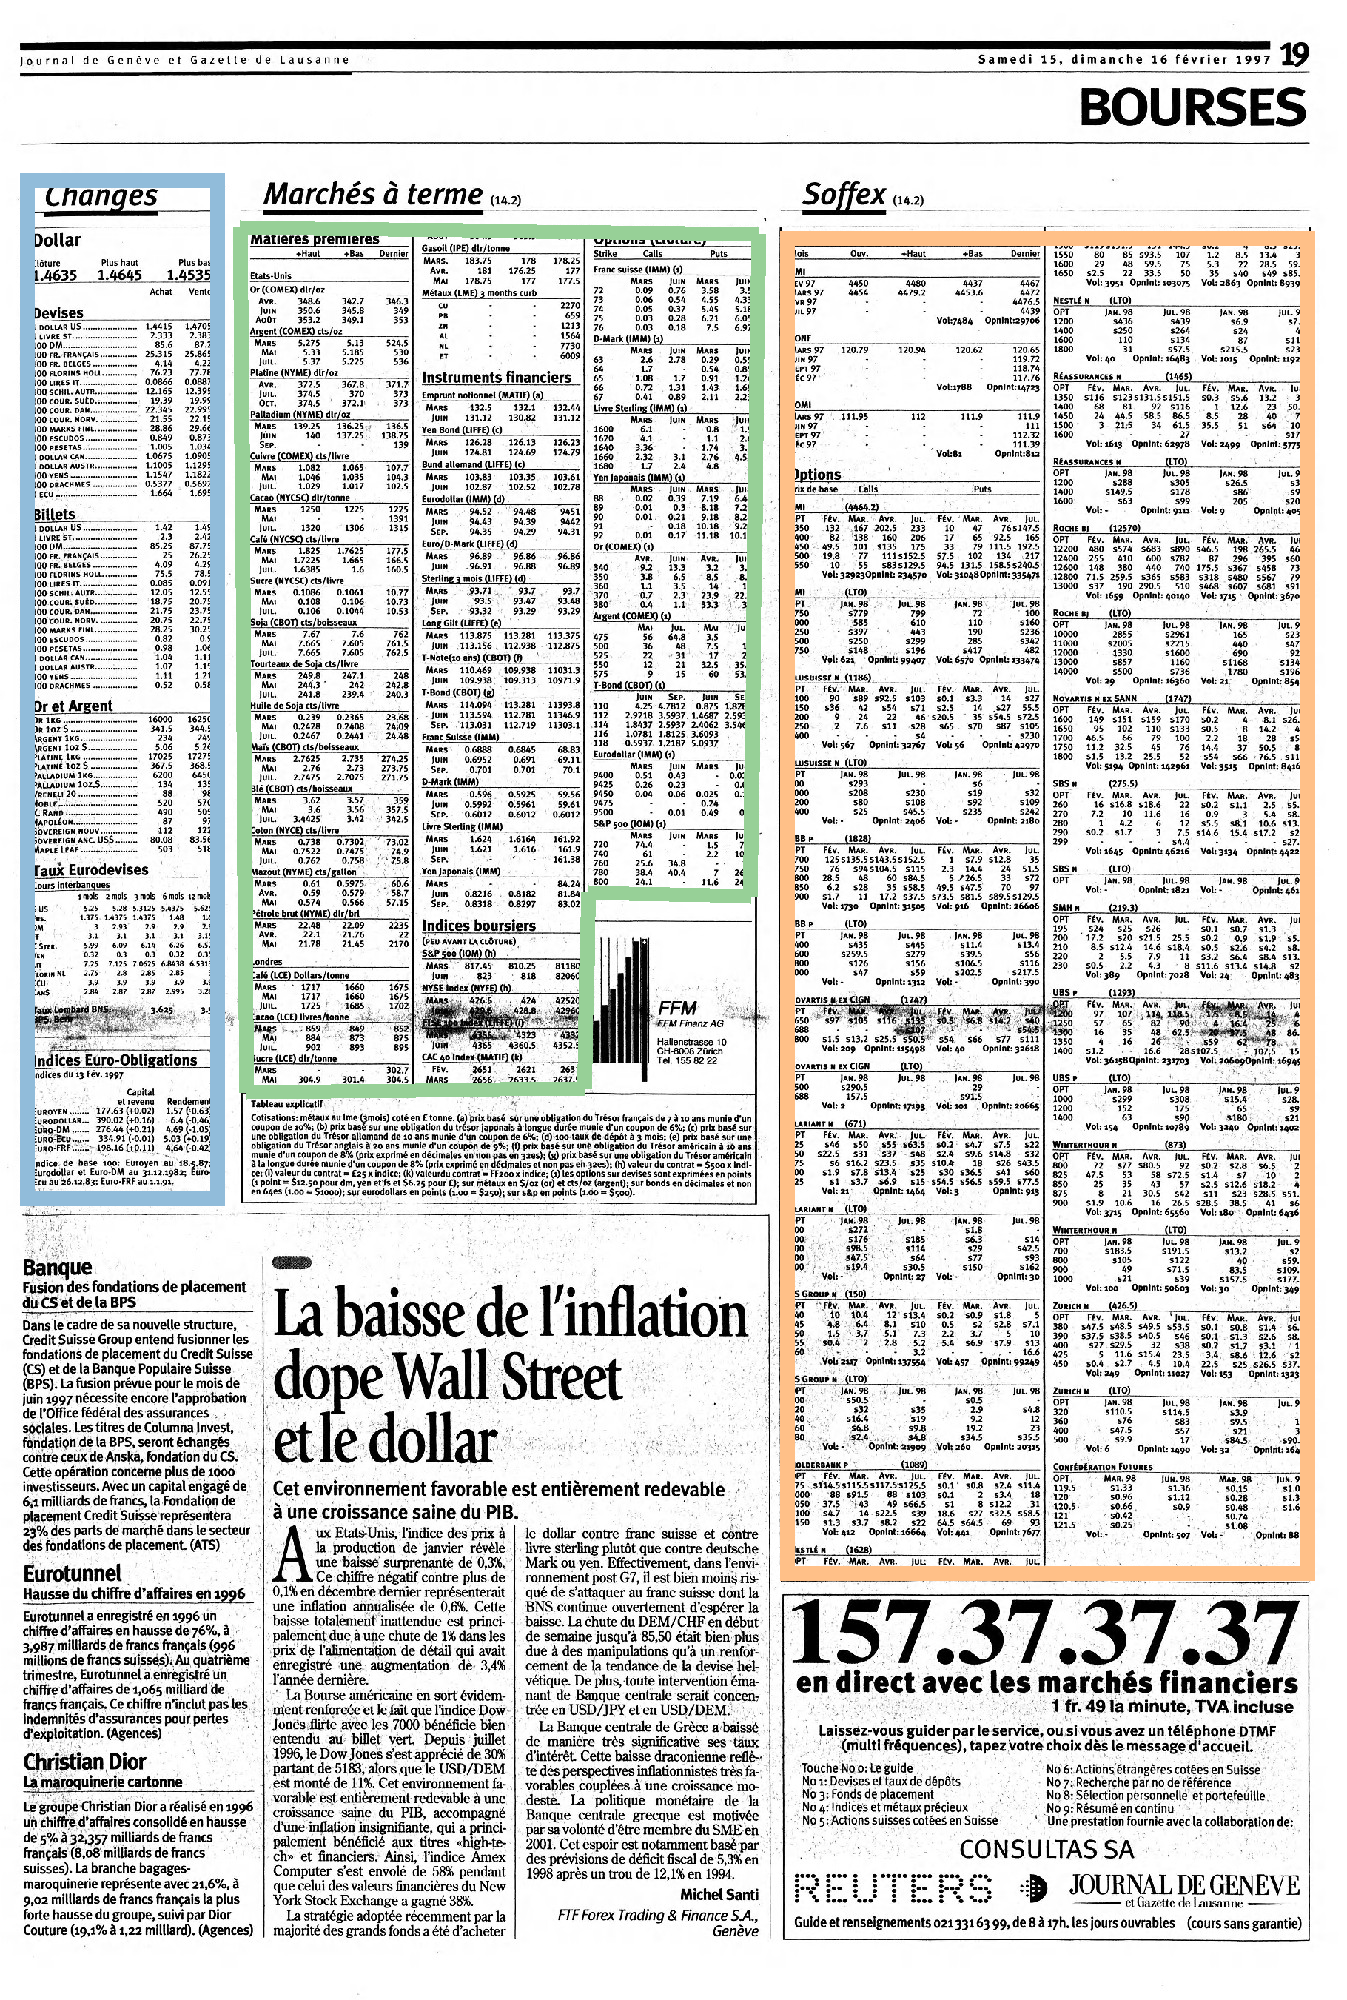

In [4]:
pid = "GDL-1997-02-15-a-p0019"

image = Image.open(os.path.join(data_path, "full images", pid + ".jpg")).convert("RGBA")
draw = ImageDraw.Draw(image, "RGBA")

pid_annotations = {k: v for k,v in via_annotations_RB.items() if pid in k}
for k, v in pid_annotations.items():
    for i, region in enumerate(v['regions']):
        r = region['shape_attributes']
        if r['name'] == 'rect':
            x, y, w, h = r['x'], r['y'], r['width'], r['height']
            draw.rectangle([x, y, x + w, y + h], outline=colors[i], width=15)
        elif r['name'] == 'polygon':
            x, y = r['all_points_x'], r['all_points_y']
            draw.line(list(zip(x, y)) + [(x[0], y[0])], fill=colors[i], width=15)

image.thumbnail((2000,2000),Image.ANTIALIAS)
image.save(os.path.join(figures_path, "rb_segmentation_tables.png"))
image